In [1]:
from FaceLoader import FaceLoader
from keras.models import load_model
from SocialProcessor import SocialProcessor
import cv2
import numpy as np
from matplotlib.pyplot import imshow
import os
import keras.backend.tensorflow_backend as tb
tb._SYMBOLIC_SCOPE.value = True
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import json
import mysql.connector

from IPython.display import Image


%matplotlib inline

Using TensorFlow backend.


In [58]:
url = "https://sun9-57.userapi.com/c639626/v639626573/395bc/353RaT7o0Yc.jpg"
loader = FaceLoader(url)
loader.downloadImg()

In [70]:
images = loader.load_and_align_image()

In [71]:
len(images)

2

In [72]:
ind = 0

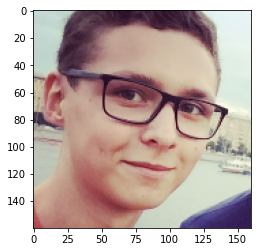

In [73]:
imshow(images[ind])

In [74]:
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [75]:
embs = loader.calc_embs(model=model, images=images)

In [76]:
len(embs)

2

In [77]:
conn = mysql.connector.connect(user='face', host="localhost", password="Hr3mI3PM5JlFWrub", database='global_scrape', port=8889, collation="utf8mb4_general_ci")

In [78]:
processor = SocialProcessor(conn, model)

In [79]:
matches = processor.findMatches(embs[ind], batch=1000, threshold=1)

In [80]:
print(len(matches))

184


0.8149420604725672
https://vk.com/id162195278
https://sun9-35.userapi.com/c850428/v850428035/12d334/VTSo1J8HVog.jpg
0.6679347103593912


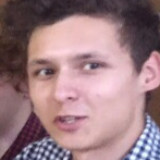

In [95]:
match_ind = 59
print(matches[match_ind][-1])
print("https://vk.com/id"+matches[match_ind][-4])
print(matches[match_ind][0])
print(1 - FaceLoader.calc_dist_cosine(embs[ind], json.loads(matches[match_ind][1])))
Image(filename='./fragments/' + matches[match_ind][-2] + '.png')